https://stackoverflow.com/a/46553073/2713722

In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pytesseract

In [2]:
def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=1.0, threshold=0):
    """Return a sharpened version of the image, using an unsharp mask."""
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

error: OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


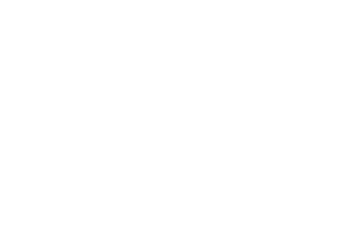

In [3]:
im = cv2.imread('./frames/frame11.png')

plt.axis("off")
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
unsharp = unsharp_mask(im)

plt.axis("off")
plt.imshow(cv2.cvtColor(unsharp, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
gray = cv2.cvtColor(unsharp, cv2.COLOR_BGR2GRAY)  # В оттенки серого

plt.axis("off")
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
gray = cv2.resize(gray, None, fx=6, fy=6)
blur = cv2.medianBlur(gray, 3)

plt.axis("off")
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
print(pytesseract.image_to_string(blur, config='--psm 4'))

In [ ]:
print(pytesseract.image_to_string(blur))

In [ ]:
print(pytesseract.image_to_string(gray, config='--psm 4'))

In [ ]:
print(pytesseract.image_to_string(gray))

In [ ]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)[1]

plt.figure(figsize = (20,10))
plt.axis("off")
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.show()

In [ ]:
print(pytesseract.image_to_string(thresh))